In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import os
import tarfile
from six.moves import urllib

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression

In [6]:
# get data from git at: https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# ideally you would write this function in pycharm and then call it here from a .py file
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [7]:
# run
fetch_housing_data()

In [8]:
# function to load into pandas
# ideally you would write this function in pycharm and then call it here from a .py file
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [9]:
#check out the data 
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info() # big things to notice, total bedrooms is missing values
# ocean proximity is not an interger
# we can confrim this by looking at the .head() and see it is cataogrical 
# in a csv objects are usually text

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
# we use value_counts on catagorical variables
housing['ocean_proximity'].value_counts()
# 5 island locations for the introverts

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe() # inferentail stats breakdown 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0b48cb00>,
      dtype=object)

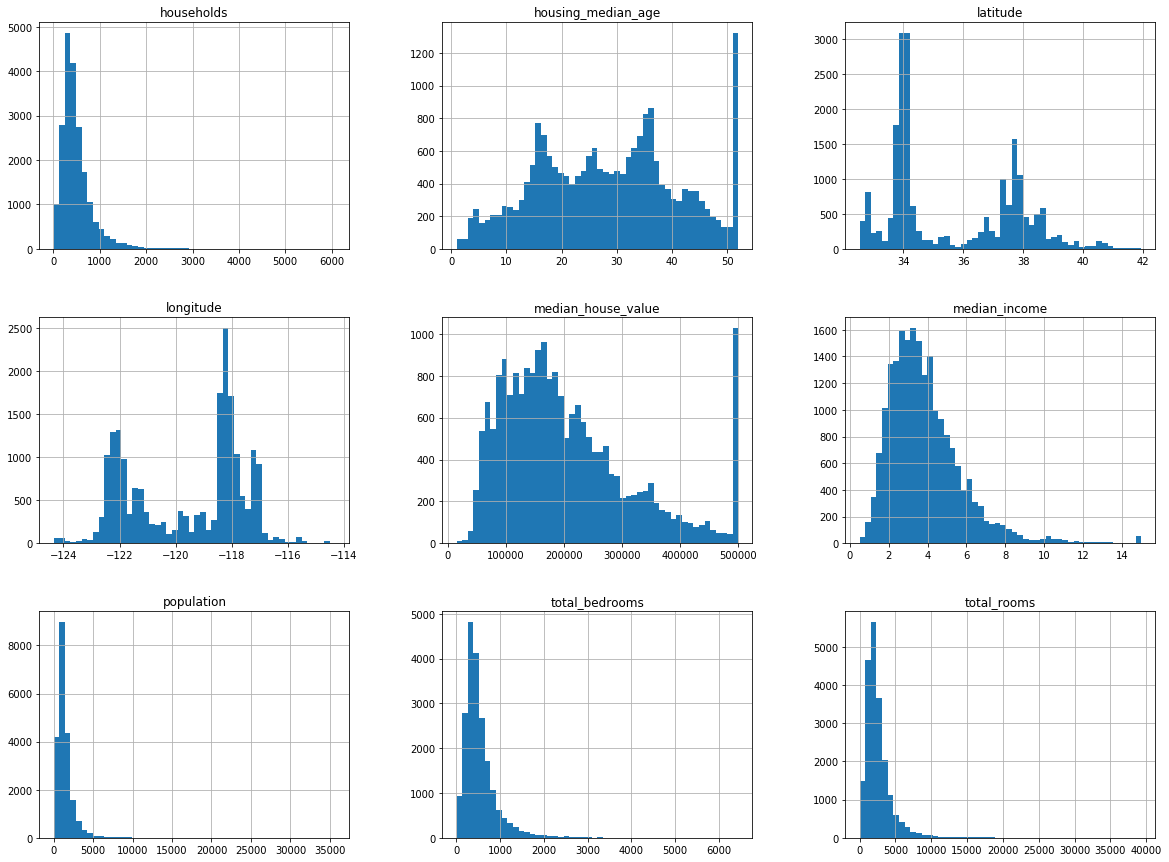

In [13]:
housing.hist(bins = 50, figsize = (20,15))
# okay so there are alot of right tailed graphs here in the data
# this tells us that we do not have a nice normal distribution
# this will influence our statistical assumptions 

In [14]:
"""
We want to split the data now to create a test and train set. 
If we are actaully putting this code into production, we do not want the algorithm to see all of the data
as we repeat the process, the split data might bleed over
so we split it now. if we have more data feeding in, we need to make sure it is appeneded at the end of of the df
"""

'\nWe want to split the data now to create a test and train set. \nIf we are actaully putting this code into production, we do not want the algorithm to see all of the data\nas we repeat the process, the split data might bleed over\nso we split it now. if we have more data feeding in, we need to make sure it is appeneded at the end of of the df\n'

In [15]:
# use sklearn train test split
train_set, test_set = train_test_split(housing, test_size = 0.3, random_state = 101)
"""
this takes the data and randomly splits it into two sets. 30% of the data is randomly removed and split
into a testing set that we will use once we have trained the model
"""

'\nthis takes the data and randomly splits it into two sets. 30% of the data is randomly removed and split\ninto a testing set that we will use once we have trained the model\n'

In [16]:
# munging catagories
"""
Simple Random sampling has some issues with a small data set. We need to look at 'munging' the data the data to create
equal strata. Usually income is a good variable. The issue here is that the median income of one of the 'left skewed' 
graphs we mentioned earlier. This we will have to 'munge' the data to get a more normal distribution
"""
# creating income catergory by dividing median income by 1.5 and rouding using ceil (descrete categories)
housing["income_cat"] = np.ceil(housing["median_income"]/1.5) # create new column with numpy operation to round up
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True) # limits the catagories to 5 for extreme income levels

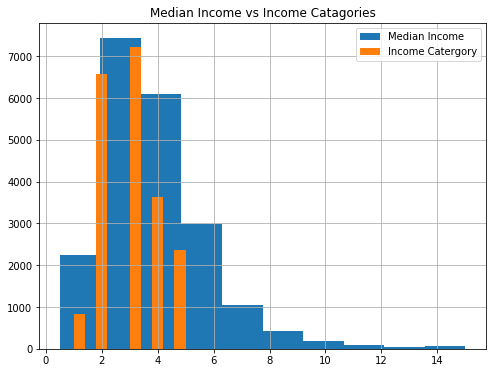

In [17]:
# compare housing income vs income_cat
plt.figure(figsize = (8,6))
housing["median_income"].hist(label = 'Median Income') # blue
housing["income_cat"].hist(label = 'Income Catergory') # orange
plt.title('Median Income vs Income Catagories', loc = 'center') # add a title
plt.legend(loc = 'upper right') # add legend, automatically uses label for legend
# notice how we have a much more 'normal' distibution and got rid of the the right tail

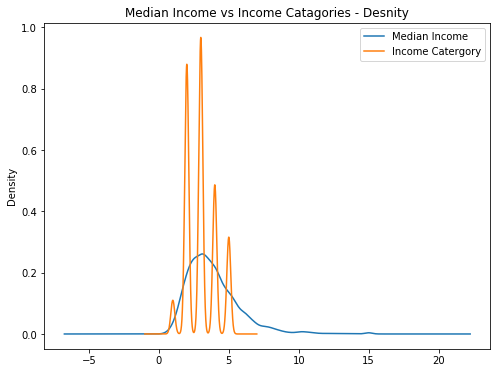

In [18]:
# density for the more stastically minded 
# compare housing income vs income_cat
plt.figure(figsize = (8,6))
housing["median_income"].plot.density(label = 'Median Income') # blue
housing["income_cat"].plot.density(label = 'Income Catergory') # orange
plt.title('Median Income vs Income Catagories - Desnity', loc = 'center') # add a title
plt.legend(loc = 'upper right') # add legend, automatically uses label for legend
# notice how we have a much more 'normal' distibution and got rid of the the right tail

In [19]:
# Sklearn has a stratified sampleing tool built in 
# StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 101) # I use 0.3 and 101 from habit 
for train_index, test_index in split.split(housing, housing["income_cat"]): # splitting df housing, by column 'income_cat'
    strat_train_set = housing.loc[train_index] # .loc is a position based selection 
    strat_test_set = housing.loc[test_index] # Selecting rows by label/index or Selecting rows with a boolean / conditional lookup

In [20]:
# check by looking at income_cat proportions
print('Stratified Test Set Value Counts')
print(strat_test_set['income_cat'].value_counts())
print("\n")
print('Stratified Test Set Proportions')
strat_test_set['income_cat'].value_counts() / len(strat_test_set)
# number in each catergory / total 

Stratified Test Set Value Counts
3.0    2171
2.0    1974
4.0    1092
5.0     708
1.0     247
Name: income_cat, dtype: int64


Stratified Test Set Proportions


3.0    0.350614
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039890
Name: income_cat, dtype: float64

In [21]:
## we will use visuals to explore the data
# create a copy of the data so that we do not change anything
# only use the training set
housing = strat_train_set.copy()

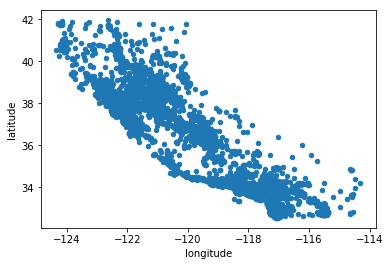

In [22]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")
# we get a basic outline of Cali

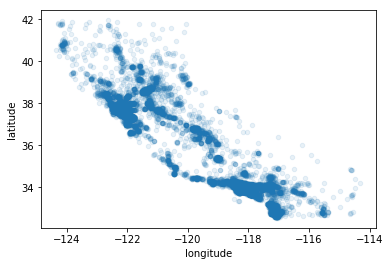

In [23]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)
#add thew alpha to see density concentrations

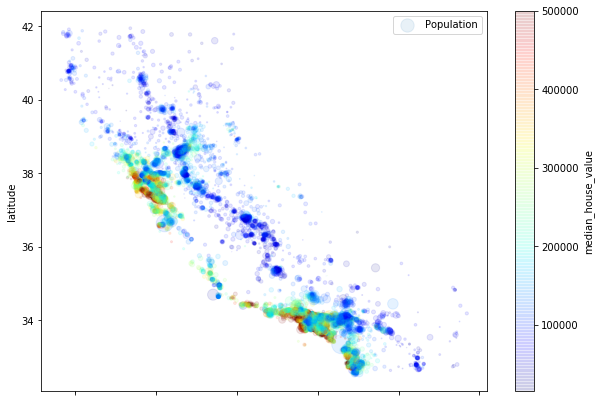

In [24]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1
            , s = housing["population"]/100, label = "Population", figsize = (10,7)
            , c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()
# cloropleth showing housing prices 

In [25]:
# Looking for correlations
corr_matrix = housing.corr()

In [26]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690275
income_cat            0.645725
total_rooms           0.130168
housing_median_age    0.106635
households            0.060634
total_bedrooms        0.044369
population           -0.028796
longitude            -0.048920
latitude             -0.140069
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1adec8d0>,
      dtype=object)

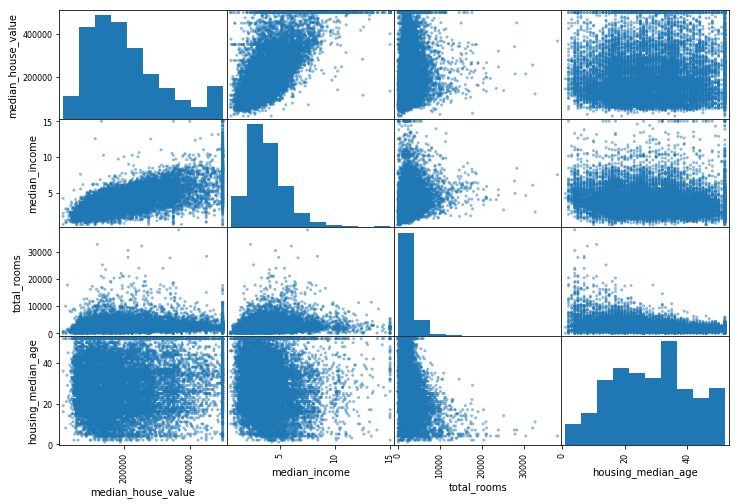

In [27]:
# we can use pandas built in scatter matrix for numerical values
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"] # leaving lat and long
scatter_matrix(housing[attributes], figsize = (12,8)) # seaborn has the same fuction
# the seaborn function is all scatter plots, here we have histograms which are much more useful

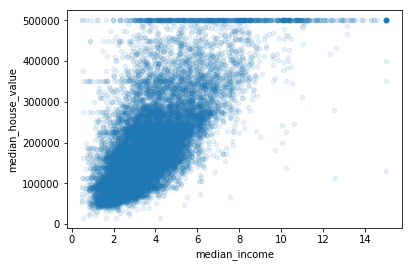

In [28]:
# focusing on median income and median house value 
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)

In [29]:
# Experimenting with Attribute Combinations
# Rooms per house hold
## bedrooms per room
### population per household

housing["rooms_per_houshold"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [30]:
# looking at correlations
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.690275
income_cat                  0.645725
rooms_per_houshold          0.156440
total_rooms                 0.130168
housing_median_age          0.106635
households                  0.060634
total_bedrooms              0.044369
population_per_household   -0.021465
population                 -0.028796
longitude                  -0.048920
latitude                   -0.140069
bedrooms_per_room          -0.253960
Name: median_house_value, dtype: float64

In [62]:
# prepare the data from ML 
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [63]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
7228,-118.16,34.01,40.0,1552.0,NaN,1919.0,427.0,2.2596,<1H OCEAN,2.0
14331,-117.15,32.72,51.0,1321.0,NaN,781.0,499.0,1.3071,NEAR OCEAN,1.0
16880,-122.39,37.59,32.0,4497.0,NaN,1846.0,715.0,6.1323,NEAR OCEAN,5.0
17202,-119.73,34.44,38.0,1729.0,NaN,801.0,395.0,3.1364,NEAR OCEAN,3.0
13332,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,INLAND,3.0


In [64]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [65]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
7228,-118.16,34.01,40.0,1552.0,1919.0,427.0,2.2596,<1H OCEAN,2.0
14331,-117.15,32.72,51.0,1321.0,781.0,499.0,1.3071,NEAR OCEAN,1.0
16880,-122.39,37.59,32.0,4497.0,1846.0,715.0,6.1323,NEAR OCEAN,5.0
17202,-119.73,34.44,38.0,1729.0,801.0,395.0,3.1364,NEAR OCEAN,3.0
13332,-117.65,34.04,15.0,3393.0,2039.0,611.0,3.9336,INLAND,3.0


In [66]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
7228,-118.16,34.01,40.0,1552.0,433.5,1919.0,427.0,2.2596,<1H OCEAN,2.0
14331,-117.15,32.72,51.0,1321.0,433.5,781.0,499.0,1.3071,NEAR OCEAN,1.0
16880,-122.39,37.59,32.0,4497.0,433.5,1846.0,715.0,6.1323,NEAR OCEAN,5.0
17202,-119.73,34.44,38.0,1729.0,433.5,801.0,395.0,3.1364,NEAR OCEAN,3.0
13332,-117.65,34.04,15.0,3393.0,433.5,2039.0,611.0,3.9336,INLAND,3.0


In [67]:
from sklearn.impute import SimpleImputer

In [68]:
imputer = SimpleImputer(strategy="median")

In [69]:
housing_num = housing.drop('ocean_proximity', axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [70]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [71]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2122.    ,  433.5   , 1161.    ,
        408.    ,    3.5326,    3.    ])

In [72]:
housing_num.median().values

array([-118.49  ,   34.26  ,   29.    , 2122.    ,  433.5   , 1161.    ,
        408.    ,    3.5326,    3.    ])

In [73]:
X = imputer.transform(housing_num)

In [74]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))

In [75]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
7228,-118.16,34.01,40.0,1552.0,433.5,1919.0,427.0,2.2596,2.0
14331,-117.15,32.72,51.0,1321.0,433.5,781.0,499.0,1.3071,1.0
16880,-122.39,37.59,32.0,4497.0,433.5,1846.0,715.0,6.1323,5.0
17202,-119.73,34.44,38.0,1729.0,433.5,801.0,395.0,3.1364,3.0
13332,-117.65,34.04,15.0,3393.0,433.5,2039.0,611.0,3.9336,3.0


In [76]:
imputer.strategy

'median'

In [77]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-118.49,34.23,32.0,4373.0,683.0,2040.0,693.0,5.2668,4.0
1,-118.15,34.04,39.0,1099.0,263.0,787.0,269.0,3.7794,3.0
2,-121.48,38.56,52.0,814.0,216.0,327.0,181.0,2.8542,2.0
3,-118.40,34.15,41.0,2394.0,500.0,837.0,417.0,4.3889,3.0
4,-118.49,34.02,30.0,2075.0,687.0,1026.0,592.0,3.1635,3.0


In [78]:
# preprocess catagorical input features
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
3601,<1H OCEAN
7155,<1H OCEAN
12552,INLAND
4094,<1H OCEAN
8912,<1H OCEAN
4639,<1H OCEAN
7508,<1H OCEAN
6531,<1H OCEAN
4252,<1H OCEAN
5886,<1H OCEAN


In [79]:
from sklearn.preprocessing import OrdinalEncoder

In [80]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [81]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [82]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<14448x5 sparse matrix of type '<class 'numpy.float64'>'
	with 14448 stored elements in Compressed Sparse Row format>

In [83]:
# By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [84]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [85]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [86]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'income_cat'],
      dtype='object')

In [87]:
# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [88]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [89]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
0,-118.49,34.23,32,4373,683,2040,693,5.2668,<1H OCEAN,4,6.31025,2.94372
1,-118.15,34.04,39,1099,263,787,269,3.7794,<1H OCEAN,3,4.0855,2.92565
2,-121.48,38.56,52,814,216,327,181,2.8542,INLAND,2,4.49724,1.80663
3,-118.4,34.15,41,2394,500,837,417,4.3889,<1H OCEAN,3,5.74101,2.00719
4,-118.49,34.02,30,2075,687,1026,592,3.1635,<1H OCEAN,3,3.50507,1.73311


In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [91]:
housing_num_tr

array([[ 0.53831724, -0.6537823 ,  0.26233177, ...,  0.38091351,
        -0.01315262, -0.8811171 ],
       [ 0.70812647, -0.74277965,  0.81882111, ..., -0.57374251,
        -0.01462976,  0.38401212],
       [-0.95500513,  1.37442057,  1.85230131, ..., -0.39706327,
        -0.10609268,  0.78045985],
       ...,
       [ 1.21255978, -1.36107706,  0.42132872, ..., -0.92978135,
        -0.04248642,  1.92122476],
       [ 1.22254856, -1.15966199, -1.72513015, ...,  0.31163447,
         0.02596537, -0.74506743],
       [-0.65034739,  2.77027381, -0.61215148, ...,  0.16333247,
         0.03318409, -0.35655814]])

In [92]:
 from sklearn.compose import ColumnTransformer

In [93]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [94]:
housing_prepared

array([[ 0.53831724, -0.6537823 ,  0.26233177, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70812647, -0.74277965,  0.81882111, ...,  0.        ,
         0.        ,  0.        ],
       [-0.95500513,  1.37442057,  1.85230131, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.21255978, -1.36107706,  0.42132872, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.22254856, -1.15966199, -1.72513015, ...,  0.        ,
         0.        ,  0.        ],
       [-0.65034739,  2.77027381, -0.61215148, ...,  0.        ,
         0.        ,  0.        ]])

In [95]:
housing_prepared.shape

(14448, 17)

In [96]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [97]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])


In [98]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [99]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[ 0.53831724, -0.6537823 ,  0.26233177, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70812647, -0.74277965,  0.81882111, ...,  0.        ,
         0.        ,  0.        ],
       [-0.95500513,  1.37442057,  1.85230131, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.21255978, -1.36107706,  0.42132872, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.22254856, -1.15966199, -1.72513015, ...,  0.        ,
         0.        ,  0.        ],
       [-0.65034739,  2.77027381, -0.61215148, ...,  0.        ,
         0.        ,  0.        ]])

In [100]:
#The result is the same as with the ColumnTransformer:
np.allclose(housing_prepared, old_housing_prepared)

True

In [101]:
# the steps above were about preparing data for ML, now we can beging applying ML Models
# train a model
# linear regression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
# that's it lol, we know have a working model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
# going to try out the model on a couple different instances 
some_data = housing.iloc[:5] # first 5 in train data 
some_labels = housing_labels.iloc[:5] # first 5 in train set
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [279287.39352524 224422.58055267 144142.08209924 267808.67106968
 251247.58138187]


In [104]:
print("Labels:", list(some_labels))

Labels: [242300.0, 194600.0, 125000.0, 380400.0, 366700.0]


In [105]:
# okay so we have some major variation in the predictions and the actual numbers
# this is okay since are only using 5 rows of data
# measure this regressions RMSE on the entire data set
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared) 
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse # and that is super close to the 80/20 split

68348.95555542118

In [106]:
# okay so the prediction error 68,348... 
# this so the typical prediction error is $68,348
# this is an example of underfitting we can solve underfitting by using a more powerful ML approach or 
## Training with better feautres or reducing constraints on the model 

In [107]:
# Using a Decision Treen Regressor, much more powerful model 
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

In [108]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [110]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions) # mean sqaure error
tree_rmse = np.sqrt(tree_mse) # calculating root mean square error
tree_rmse #print 
# okay well there is no way that we perfectly fitted the data
# this is an example of over fitting 

0.0

In [111]:
"""
Okay so linear regression badly underfitted the model. being off by almost 70,000$ is not good for investing.
The decision tree regressor completely overfit the model. We will now have to turn to cross validation as a 
better method of evaluation. 
"""

'\nOkay so linear regression badly underfitted the model. being off by almost 70,000$ is not good for investing.\nThe decision tree regressor completely overfit the model. We will now have to turn to cross validation as a \nbetter method of evaluation. \n'

In [113]:
# we will use K-Fold cross validation. this splits the data into 10 sections and compares them to each other. 
# Cross-Validation features expect a utility function, big is better 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [117]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("STD:", scores.std())

In [118]:
display_scores(tree_rmse_scores)

Scores: [73744.39406744 73467.07931653 79358.02749351 74803.20346406
 68999.09783802 67753.37667484 66475.54991088 73568.80047621
 74661.92210097 69558.19615543]
Mean: 72238.96474978971
STD: 3737.5239341454985


In [119]:
# so now we have the score for each model, the mean of all the models combined, and the STD 
# compare this to scores of linear regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [121]:
display_scores(lin_rmse_scores)
# notice that we have a pretty sizable decrease in STD $1000 
# it may be worth looking at the range as well to see how much a differnce we have in 
# so far the cross validation of linear models are better than decision trees

Scores: [71366.06607461 73738.6325843  66731.01793412 71901.74671443
 67622.67701233 68466.57084777 64668.88994974 68435.05222889
 65322.40051246 69891.51976348]
Mean: 68814.45736221145
STD: 2772.2887899338257


In [122]:
# finally we are going to do the same thing but this time with a random forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [123]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse # just a random forest, we see a jump in rmse which is good in this case!

22448.501358326226

In [124]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [125]:
display_scores(forest_rmse_scores)
# okay so we have a pretty decent reduction in the STD and the mean has also dropped

Scores: [58777.11036373 52657.47810205 54045.18153681 54643.2565324
 53797.49959909 51497.14715037 51049.00966372 52905.91895074
 50458.34527967 51931.04311561]
Mean: 53176.19902941992
STD: 2264.663888398641


In [126]:
# the score on the training set is still much lower than on the validation sets 
# this means that the model is still overfitting the training set 
# remember we want to be high not low with cross validation\

In [127]:
# okay let's look at options for fine tuning the model

In [128]:
# here we are going to use grid search to help tune the hypers
from sklearn.model_selection import GridSearchCV

In [136]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 6, 8]}
    , {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [137]:
forest_reg = RandomForestRegressor()

In [138]:
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')

In [139]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 3, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [142]:
# what should we use?
grid_search.best_params_
#max features 8 
# n_estimators 30
# these were the max features to be evaluated, we may want to try again

{'max_features': 8, 'n_estimators': 30}

In [143]:
# looking at evaluation scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63874.77945785059 {'max_features': 2, 'n_estimators': 3}
56759.94010076515 {'max_features': 2, 'n_estimators': 10}
53662.94407234524 {'max_features': 2, 'n_estimators': 30}
62839.40324202433 {'max_features': 3, 'n_estimators': 3}
54857.90634486678 {'max_features': 3, 'n_estimators': 10}
52406.9714127999 {'max_features': 3, 'n_estimators': 30}
60746.47794940016 {'max_features': 6, 'n_estimators': 3}
53100.69658695512 {'max_features': 6, 'n_estimators': 10}
51506.91413905019 {'max_features': 6, 'n_estimators': 30}
59758.78191503224 {'max_features': 8, 'n_estimators': 3}
53447.43237801213 {'max_features': 8, 'n_estimators': 10}
51297.555364786924 {'max_features': 8, 'n_estimators': 30}
62956.208708251244 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54542.84908021744 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61914.35724815924 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53615.737870746714 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [146]:
# look at evaluting feature importances 
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.11749566e-02, 5.68857336e-02, 4.67788747e-02, 1.51818728e-02,
       1.56068936e-02, 1.57882248e-02, 1.54593891e-02, 2.84833610e-01,
       1.46410376e-01, 3.53311839e-02, 1.06963982e-01, 4.78783472e-02,
       4.74755981e-03, 1.41887834e-01, 2.26598979e-04, 1.94566409e-03,
       2.89889998e-03])

In [148]:
# add the names so we know what we are looking at
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)
# with this information we may want to try and drop some of the less useful features (bottom)

[(0.28483360978683436, 'median_income'),
 (0.14641037563474793, 'income_cat'),
 (0.1418878336046312, 'INLAND'),
 (0.1069639818726383, 'pop_per_hhold'),
 (0.06117495657493133, 'longitude'),
 (0.05688573360592874, 'latitude'),
 (0.047878347229542324, 'bedrooms_per_room'),
 (0.04677887468881462, 'housing_median_age'),
 (0.035331183885094486, 'rooms_per_hhold'),
 (0.01578822478105594, 'population'),
 (0.015606893615674442, 'total_bedrooms'),
 (0.015459389093090524, 'households'),
 (0.015181872766617832, 'total_rooms'),
 (0.004747559811223228, '<1H OCEAN'),
 (0.00289889998253843, 'NEAR OCEAN'),
 (0.0019456640877637513, 'NEAR BAY'),
 (0.00022659897887262063, 'ISLAND')]

In [149]:
# okay so now that we have a idea of what model with which hyperparameters, let run this again on the test data
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

In [150]:
X_test_prepared = full_pipeline.transform(X_test)

In [151]:
final_predictions = final_model.predict(X_test_prepared)

In [153]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

50121.56451380742


In [ ]:
"""
the performance will usually be slightly worse than what you measured using the cross validation
The system was tuned to the training data and not the testing data

"""